In [2]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-24_03
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\corrected


In [4]:
file_s1 ='FGDOS_03F_HIGH_C3_4_POST-TEST_Mar_24_22-45-50_s1.csv'
file_s2 ='FGDOS_03F_HIGH_C3_4_POST-TEST_Mar_24_22-45-50_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\Arduino_CSV\corrected'+ '\\'+ file_s1 ,engine='python')
df_s2 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_03\Arduino_CSV\corrected'+ '\\'+ file_s2 ,engine='python')


FGDOS_03F_HIGH_C3_4_POST-TEST_Mar_24_22-45-50_s1.csv
FGDOS_03F_HIGH_C3_4_POST-TEST_Mar_24_22-45-50_s2.csv


In [6]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
#df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.0000,1,85,65414,67581,0,7.63,h,0,0
1,245.8766,1,85,65383,67565,0,7.63,h,0,0
2,508.1862,1,85,65338,67573,0,7.63,h,0,0
3,769.7392,1,85,65376,67535,0,7.63,h,0,0
4,1032.1197,1,85,65383,67558,0,7.63,h,0,0


In [6]:
s1[s1[:,3]<90000]

array([[0.0, 1, 81, ..., 'h', 0, 0],
       [245.9483, 1, 81, ..., 'h', 0, 0],
       [507.745, 1, 81, ..., 'h', 0, 0],
       ...,
       [367199.5442, 1, 82, ..., 'h', 0, 0],
       [369693.6551, 1, 82, ..., 'h', 0, 0],
       [384406.2697, 1, 82, ..., 'h', 0, 0]], dtype=object)

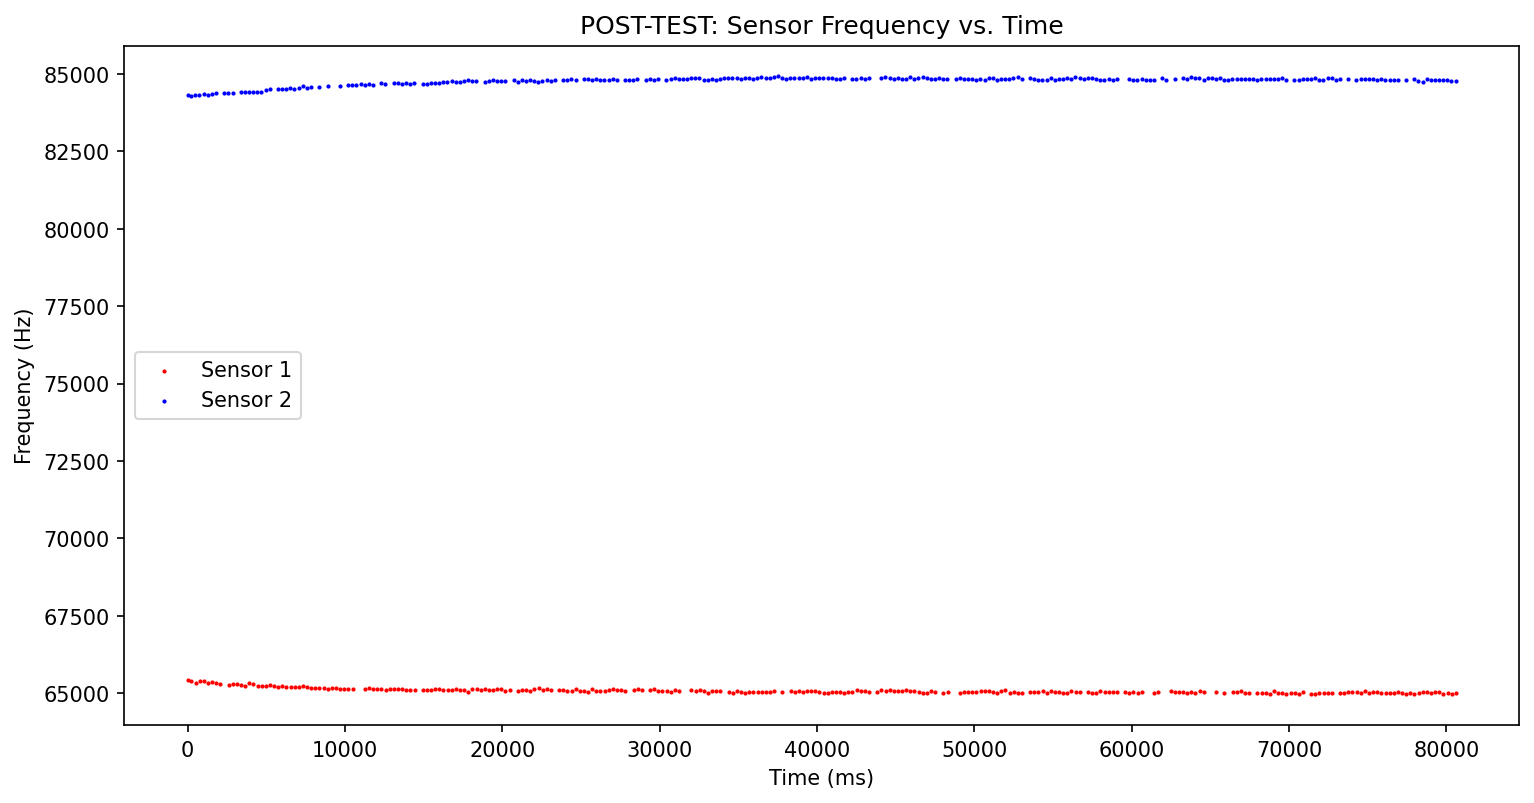

In [7]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.8e5,2.9e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("POST-TEST: Sensor Frequency vs. Time")
plt.show()

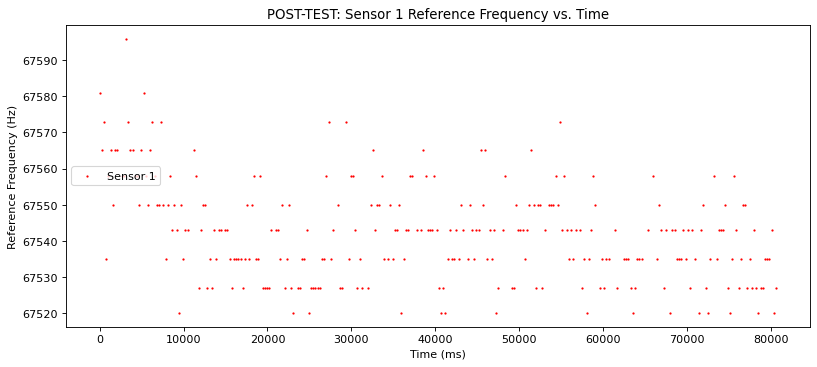

min:  67520
max:  67596
range:  76
mean:  67541.94945848375


In [8]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("POST-TEST: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())

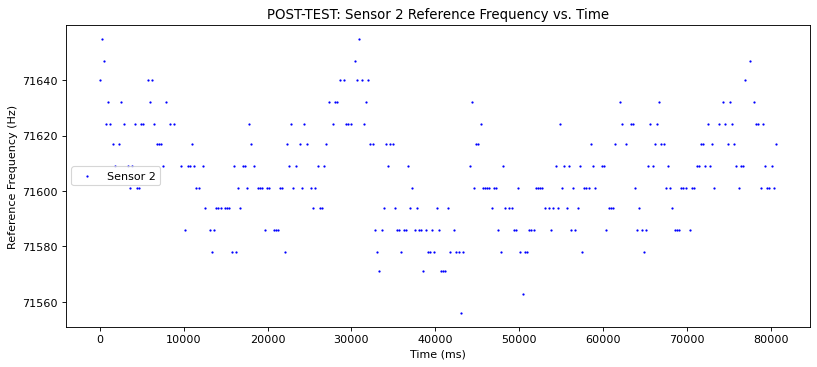

min:  71556
max:  71655
range:  99
mean:  71604.98181818181


In [9]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("POST-TEST: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())

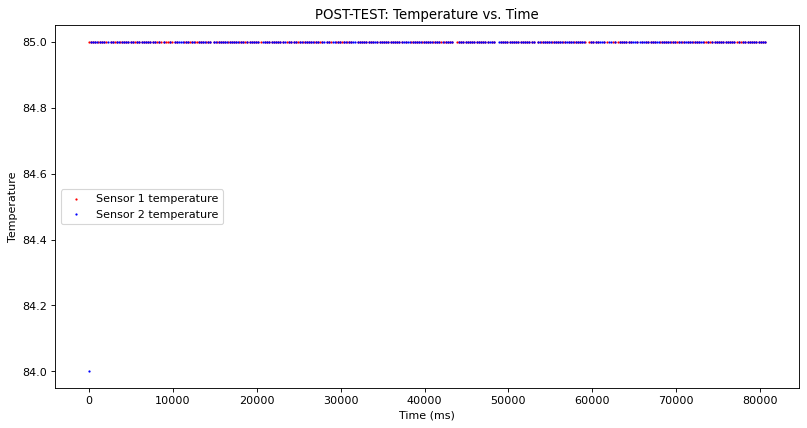

In [10]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (ms)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("POST-TEST: Temperature vs. Time")
plt.show()

In [16]:
s1[:,0].shape
        

(1388,)

In [28]:
#s1[(s1[:,0]> 3e5)]